In [2]:
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

sys.path.append('../')
from Protocols.pacing_protocol import PacingProtocol
from Protocols.leakstaircase import LeakStaircase

sys.path.append('../')
import scipy_simulator

sys.path.append('../models')
sys.path.append('../Lib')

In [9]:
from Models.ord2017 import ORD2017
'''
Beeler and Reuter 1977
'''
protocol = PacingProtocol(level=1, start=10, length=0.5, period=1000, multiplier=0, default_time_unit='ms')
model = ORD2017(protocol)
simulator = scipy_simulator.Simulator(model)

start_time = time.time()

model.name = "Beeler and Reuter 1977"
t_span = (0, 1000)
simulator.simulate(t_span)    

print("--- %s seconds ---"%(time.time()-start_time))

--- 0.6087005138397217 seconds ---


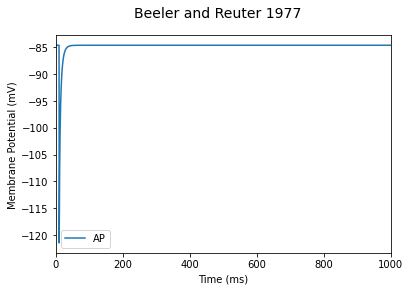

In [10]:
fig, ax = plt.subplots(figsize=(6,4))    
fig.suptitle(model.name, fontsize=14)
# ax.set_title('Simulation %d'%(simulationNo))
ax.set_xlim(model.times.min(), model.times.max())
# ax.set_ylim(ylim[0], ylim[1])
ax.set_xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')     
ax.plot(model.times, model.V, label='AP')   
# textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(GNa/g_fc[0], GNaL/g_fc[1], Gto/g_fc[2], PCa/g_fc[3], GKr/g_fc[4], GKs/g_fc[5], GK1/g_fc[6], Gf/g_fc[7])
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
#     ax.text(0.67, 0.60, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)    
#     fig1 = plt.gcf()
ax.legend()
plt.show()
fig.savefig(os.path.join('Results', "Beeler-Reuter-1977"), dpi=100)

In [5]:
sys.path.append('../Lib')
import mod_trace as trace

In [6]:
i_trace = trace.Trace(protocol,
                      cell_params=None,
                      t=model.times,
                      y=model.V,
                      command_voltages=None,            
                      current_response_info=model.current_response_info,
                      default_unit=None)

max_contributions = i_trace.current_response_info.get_max_current_contributions(time=i_trace.t,
                                                                                window=2,
                                                                                step_size=2)
max_contributions

,Current,Contribution,Time Start,Time End
0,I_Na,0.856729,642.0,644.0
1,I_si,0.072406,202.0,204.0
2,I_K1,0.991716,320.0,322.0
3,I_x1,0.001099,204.0,206.0


In [7]:
fitness = max_contributions.loc[max_contributions['Current'] == 'I_Na'][
                'Contribution'].values[0]
fitness

0.8567290548206294

In [8]:
print("Complete")

Complete
